In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import scipy
import seaborn as sns
import tensorflow.keras as k
import tensorflow
import time
import warnings 
warnings.filterwarnings('ignore')

In [2]:
train_folder="D:\\Work_folders\\datasets\\Hack Round the Clock - Datasets\\Train Data"
test_folder="D:\\Work_folders\\datasets\\Hack Round the Clock - Datasets\\Test Data"

In [3]:
df1=pd.read_csv(train_folder+"\\"+"frequency_domain_features_train.csv")
df2=pd.read_csv(train_folder+"\\"+"heart_rate_non_linear_features_train.csv")
df3=pd.read_csv(train_folder+"\\"+"time_domain_features_train.csv")

df1_test=pd.read_csv(test_folder+"\\"+"frequency_domain_features_test.csv")
df2_test=pd.read_csv(test_folder+"\\"+"heart_rate_non_linear_features_test.csv")
df3_test=pd.read_csv(test_folder+"\\"+"time_domain_features_test.csv")

In [4]:
df1.index=df1.uuid
df2.index=df2.uuid
df3.index=df3.uuid
df1_test.index=df1_test.uuid
df2_test.index=df2_test.uuid
df3_test.index=df3_test.uuid

In [5]:
(df1.index==df2.index).all(),(df2.index==df3.index).all()

(True, True)

In [6]:
df=pd.concat([df1,df2,df3],axis=1)
df_test=pd.concat([df1_test,df2_test,df3_test],axis=1)

In [7]:
df.head()

,uuid,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,...,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,uuid
uuid,,,,,,,,,,,,,,,,,,,,,
89df2855-56eb-4706-a23b-b39363dd605a,89df2855-56eb-4706-a23b-b39363dd605a,2661.894136,72.203287,1009.249419,27.375666,98.485263,15.522603,0.421047,1.514737,3686.666157,...,0.335218,-0.000203,-0.000179,0.017080,0.007969,0.007969,2.143342,-0.856554,0.335218,89df2855-56eb-4706-a23b-b39363dd605a
80c795e4-aa56-4cc0-939c-19634b89cbb2,80c795e4-aa56-4cc0-939c-19634b89cbb2,2314.265450,76.975728,690.113275,22.954139,99.695397,2.108525,0.070133,0.304603,3006.487251,...,-0.155286,-0.000059,0.000611,0.013978,0.004769,0.004769,2.930855,-0.408190,-0.155286,80c795e4-aa56-4cc0-939c-19634b89cbb2
c2d5d102-967c-487d-88f2-8b005a449f3e,c2d5d102-967c-487d-88f2-8b005a449f3e,1373.887112,51.152225,1298.222619,48.335104,98.950472,13.769729,0.512671,1.049528,2685.879461,...,-0.656813,-0.000011,-0.000263,0.018539,0.008716,0.008716,2.127053,0.351789,-0.656813,c2d5d102-967c-487d-88f2-8b005a449f3e
37eabc44-1349-4040-8896-0d113ad4811f,37eabc44-1349-4040-8896-0d113ad4811f,2410.357408,70.180308,1005.981659,29.290305,98.224706,18.181913,0.529387,1.775294,3434.520980,...,-0.386138,0.000112,0.000494,0.017761,0.008660,0.008660,2.050988,-0.504947,-0.386138,37eabc44-1349-4040-8896-0d113ad4811f
aa777a6a-7aa3-4f6e-aced-70f8691dd2b7,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7,1151.177330,43.918366,1421.782051,54.242160,96.720007,48.215822,1.839473,3.279993,2621.175204,...,-0.154252,-0.000100,-0.002736,0.023715,0.013055,0.013055,1.816544,-0.548408,-0.154252,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7


<Figure size 432x288 with 0 Axes>

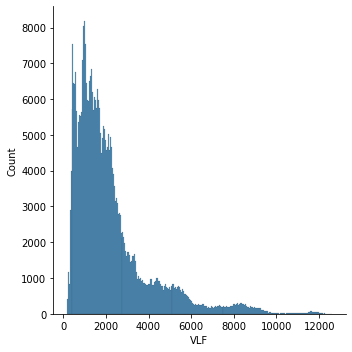

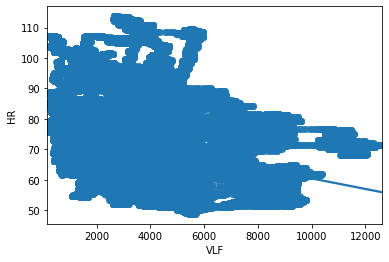

<Figure size 432x288 with 0 Axes>

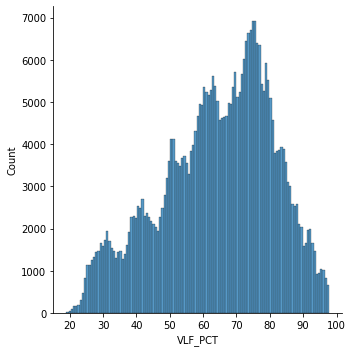

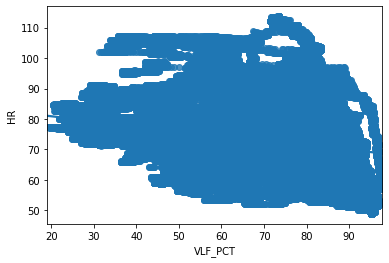

<Figure size 432x288 with 0 Axes>

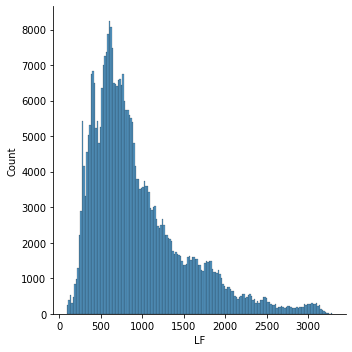

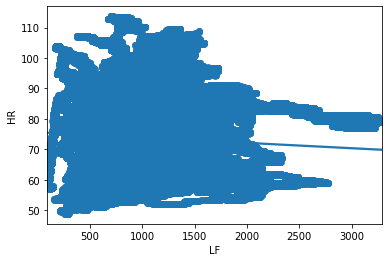

<Figure size 432x288 with 0 Axes>

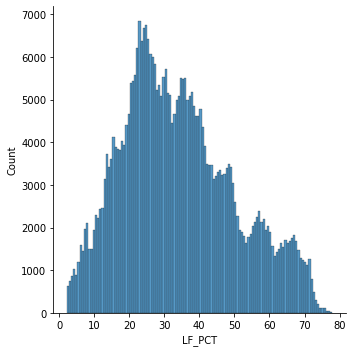

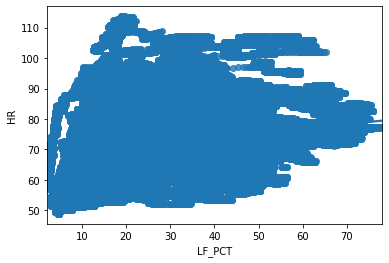

<Figure size 432x288 with 0 Axes>

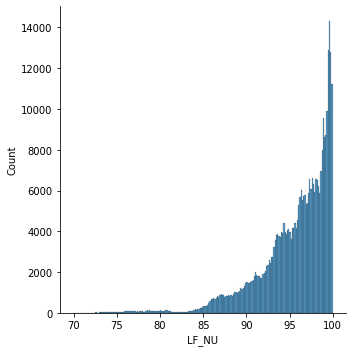

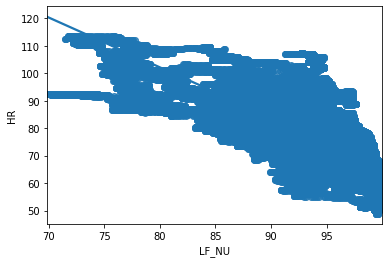

<Figure size 432x288 with 0 Axes>

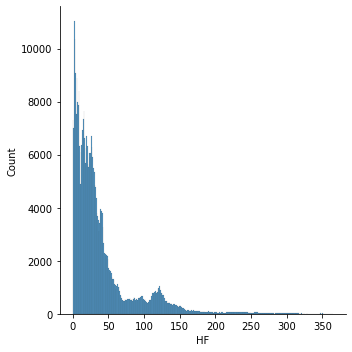

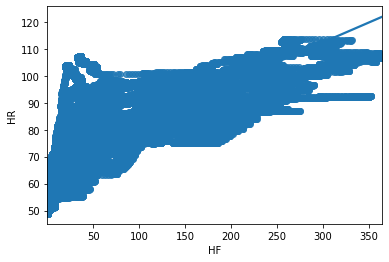

<Figure size 432x288 with 0 Axes>

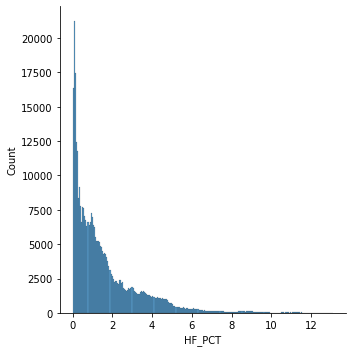

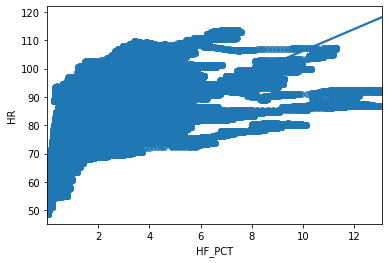

<Figure size 432x288 with 0 Axes>

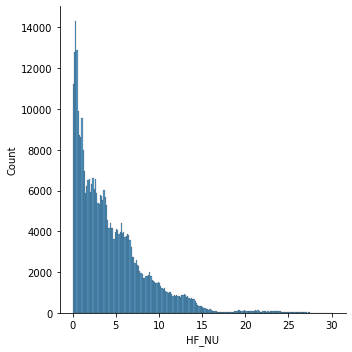

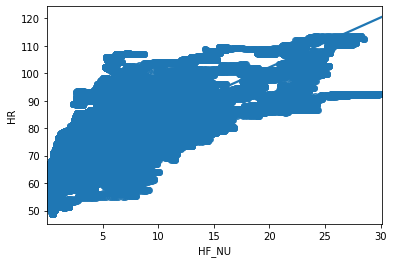

<Figure size 432x288 with 0 Axes>

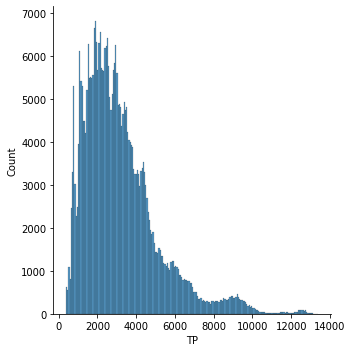

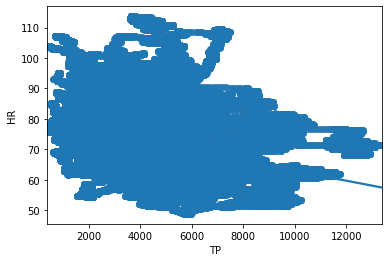

<Figure size 432x288 with 0 Axes>

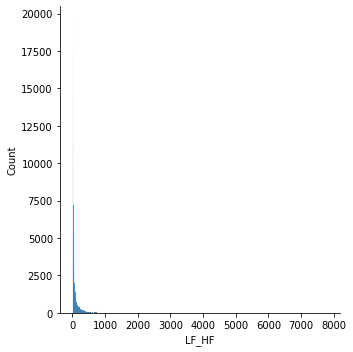

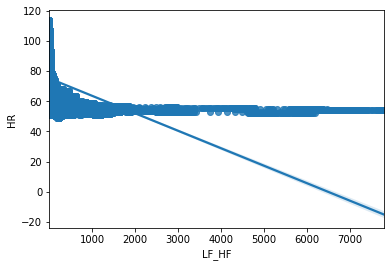

<Figure size 432x288 with 0 Axes>

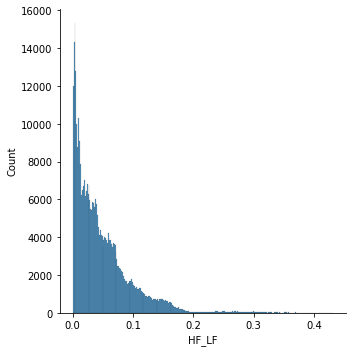

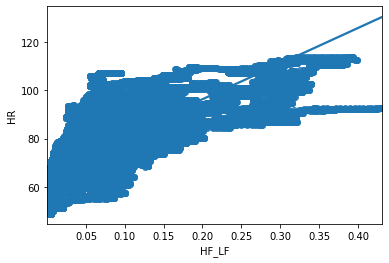

<Figure size 432x288 with 0 Axes>

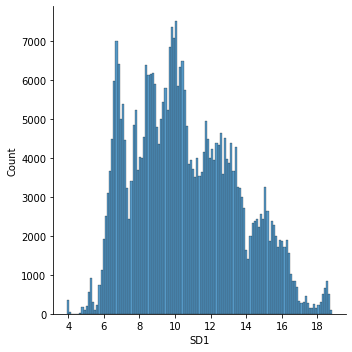

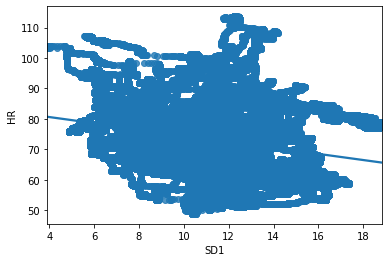

<Figure size 432x288 with 0 Axes>

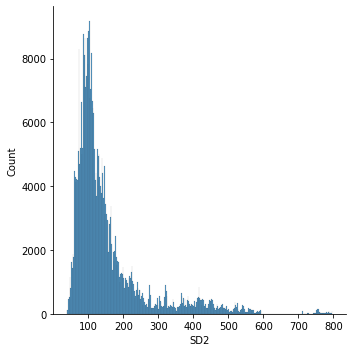

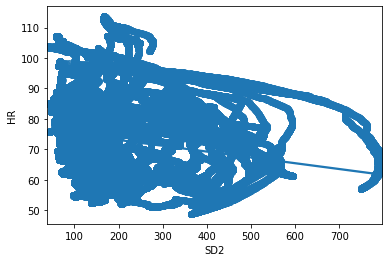

<Figure size 432x288 with 0 Axes>

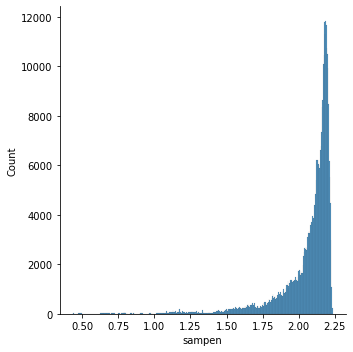

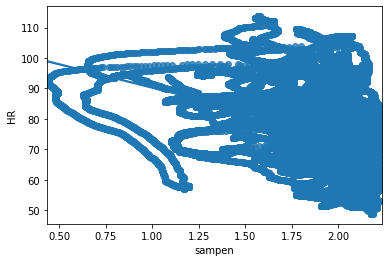

<Figure size 432x288 with 0 Axes>

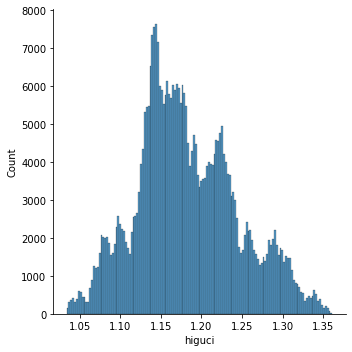

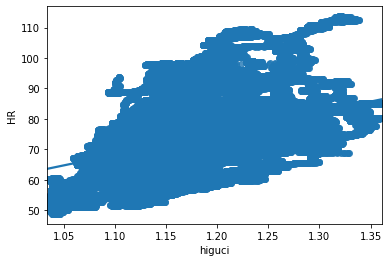

<Figure size 432x288 with 0 Axes>

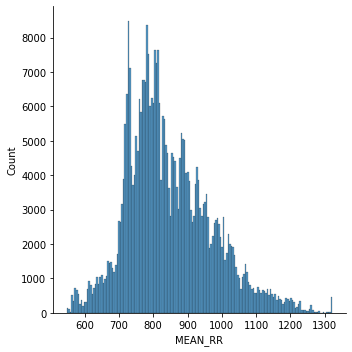

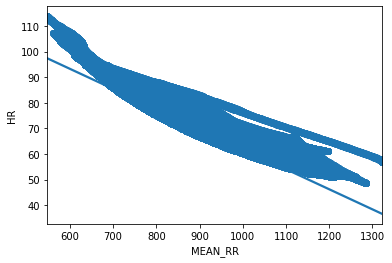

<Figure size 432x288 with 0 Axes>

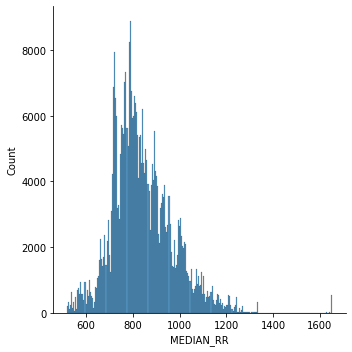

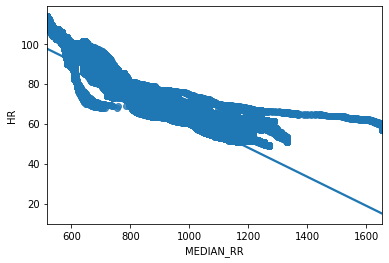

<Figure size 432x288 with 0 Axes>

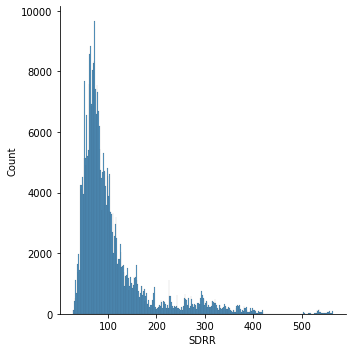

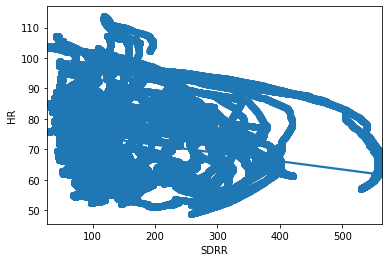

<Figure size 432x288 with 0 Axes>

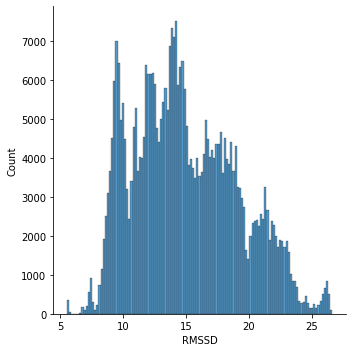

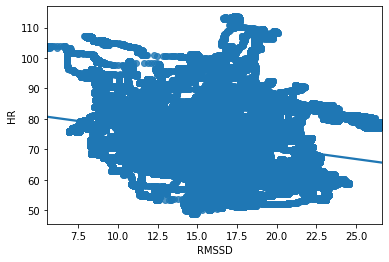

<Figure size 432x288 with 0 Axes>

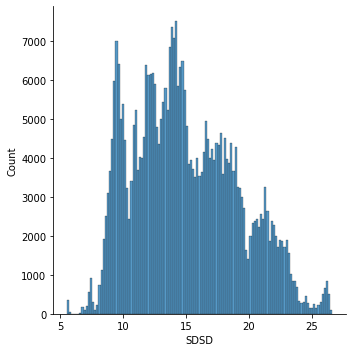

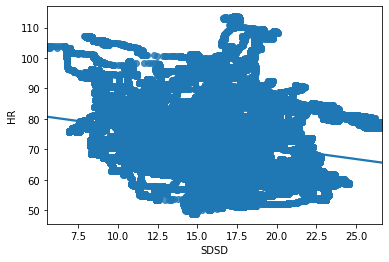

<Figure size 432x288 with 0 Axes>

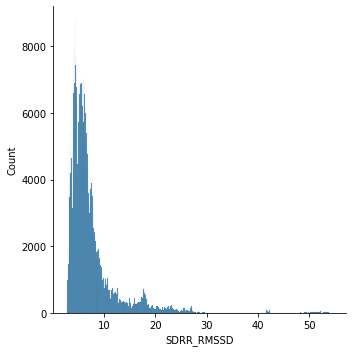

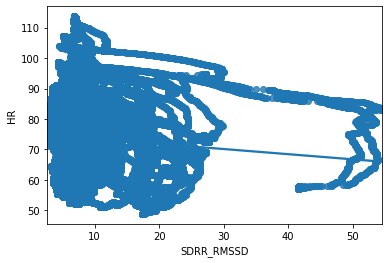

<Figure size 432x288 with 0 Axes>

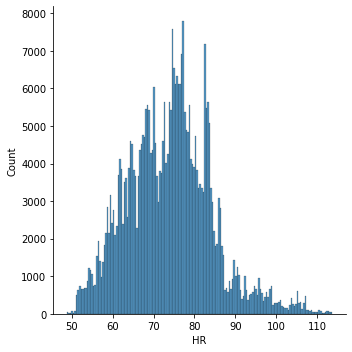

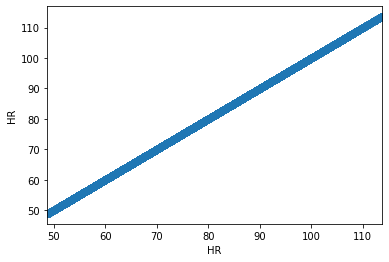

<Figure size 432x288 with 0 Axes>

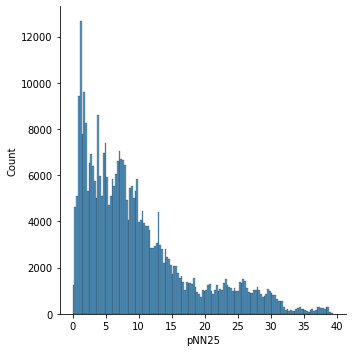

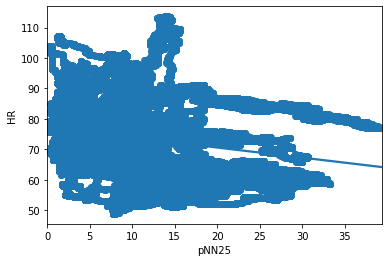

<Figure size 432x288 with 0 Axes>

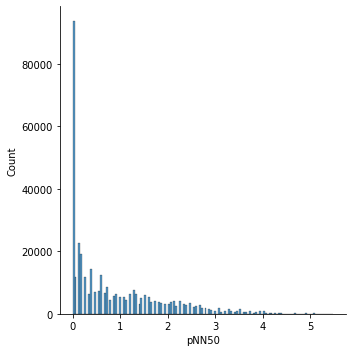

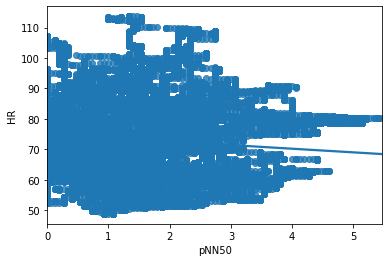

<Figure size 432x288 with 0 Axes>

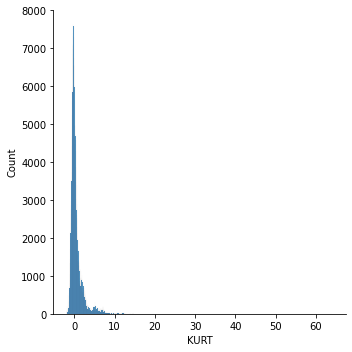

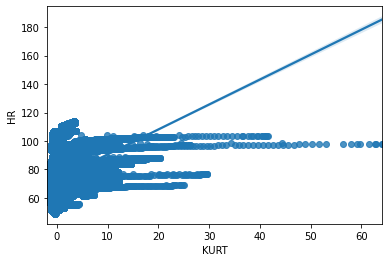

<Figure size 432x288 with 0 Axes>

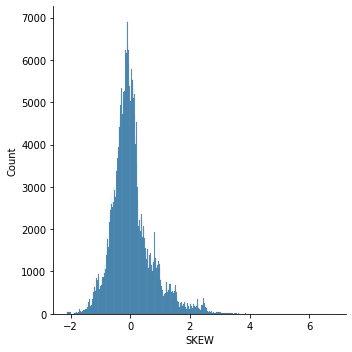

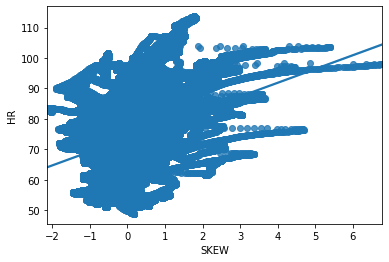

<Figure size 432x288 with 0 Axes>

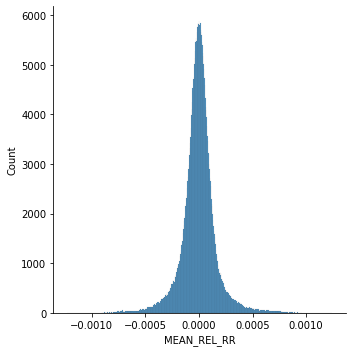

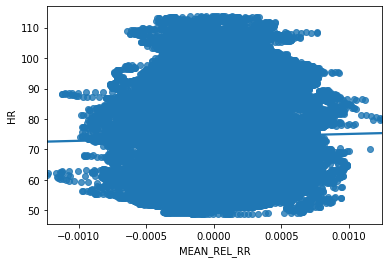

<Figure size 432x288 with 0 Axes>

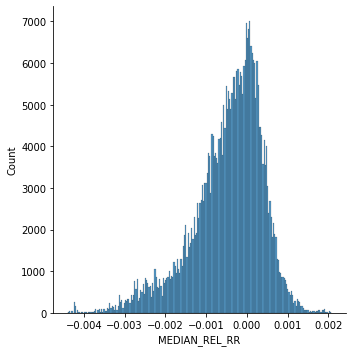

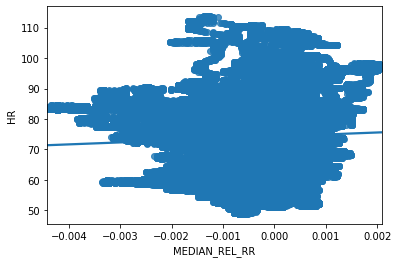

<Figure size 432x288 with 0 Axes>

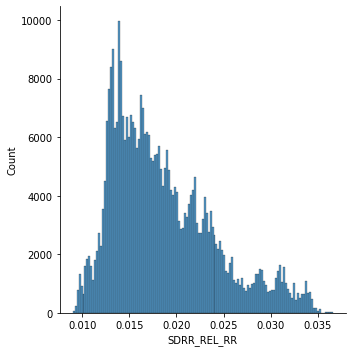

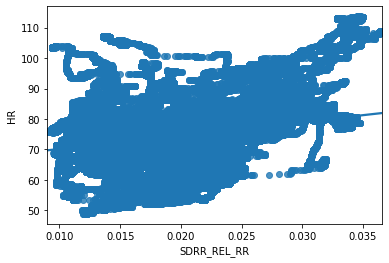

<Figure size 432x288 with 0 Axes>

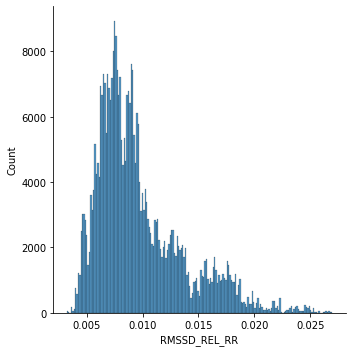

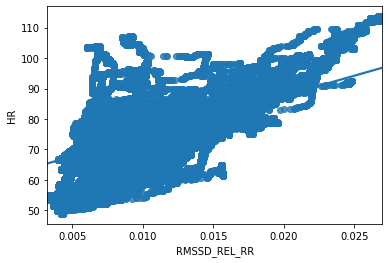

<Figure size 432x288 with 0 Axes>

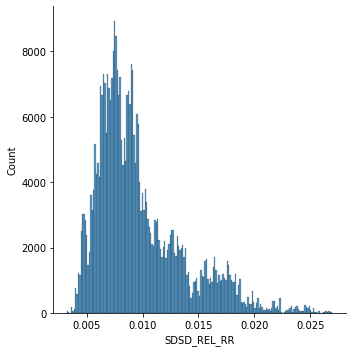

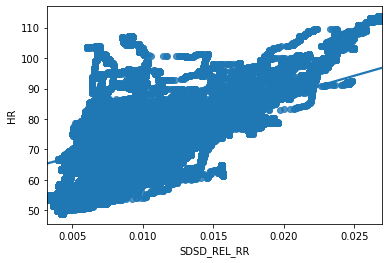

<Figure size 432x288 with 0 Axes>

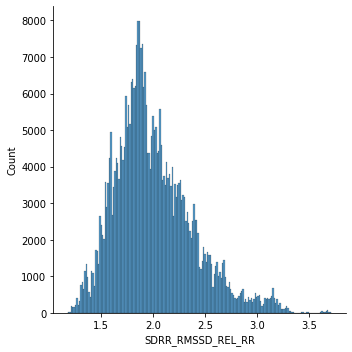

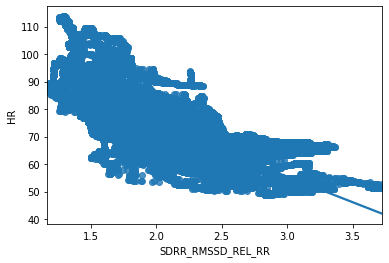

<Figure size 432x288 with 0 Axes>

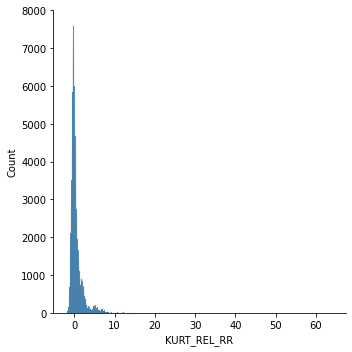

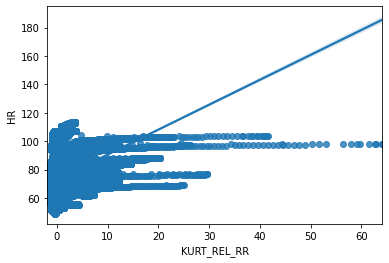

<Figure size 432x288 with 0 Axes>

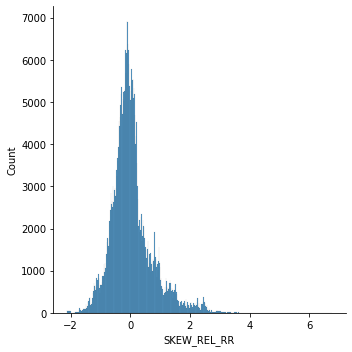

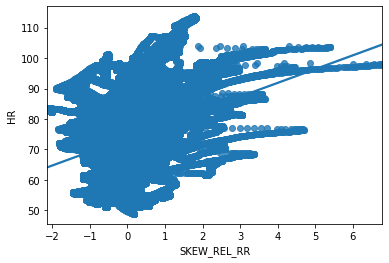

In [21]:
for each in df:
    f1=plt.figure()
    sns.displot(df[each])
    f1.show()
    f2=plt.figure()
    sns.regplot(df[each],df["HR"])
    f2.show()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1107867 entries, 89df2855-56eb-4706-a23b-b39363dd605a to 1f2eb52d-4f09-4921-a383-ef1bc6221789
Data columns (total 36 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   VLF                369289 non-null  float64
 1   VLF_PCT            369289 non-null  float64
 2   LF                 369289 non-null  float64
 3   LF_PCT             369289 non-null  float64
 4   LF_NU              369289 non-null  float64
 5   HF                 369289 non-null  float64
 6   HF_PCT             369289 non-null  float64
 7   HF_NU              369289 non-null  float64
 8   TP                 369289 non-null  float64
 9   LF_HF              369289 non-null  float64
 10  HF_LF              369289 non-null  float64
 11  SD1                369289 non-null  float64
 12  SD2                369289 non-null  float64
 13  sampen             369289 non-null  float64
 14  higuci             369289 non-null  flo

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123099 entries, 62b75db5-bc40-4c8f-9166-daf0efcab4c2 to 0b654db0-e4d3-4ba3-b9ce-9c9291c8271e
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   VLF                41033 non-null  float64
 1   VLF_PCT            41033 non-null  float64
 2   LF                 41033 non-null  float64
 3   LF_PCT             41033 non-null  float64
 4   LF_NU              41033 non-null  float64
 5   HF                 41033 non-null  float64
 6   HF_PCT             41033 non-null  float64
 7   HF_NU              41033 non-null  float64
 8   TP                 41033 non-null  float64
 9   LF_HF              41033 non-null  float64
 10  HF_LF              41033 non-null  float64
 11  SD1                41033 non-null  float64
 12  SD2                41033 non-null  float64
 13  sampen             41033 non-null  float64
 14  higuci             41033 non-null  float64
 15  datasetI

In [14]:
df.index

Index(['89df2855-56eb-4706-a23b-b39363dd605a',
       '80c795e4-aa56-4cc0-939c-19634b89cbb2',
       'c2d5d102-967c-487d-88f2-8b005a449f3e',
       '37eabc44-1349-4040-8896-0d113ad4811f',
       'aa777a6a-7aa3-4f6e-aced-70f8691dd2b7',
       'fe7b4ab0-42d3-48d0-8479-7b022d6af0bc',
       'd324b1ee-aaa1-4edb-9b46-c597cb0bbd8c',
       'cf272c21-98d8-45c1-9e2b-5ed1fe1864bd',
       'c65dcfb0-1774-4a2a-aa45-271083faeeaa',
       '79977df1-0e09-4873-bb31-15581002200b',
       ...
       'fbb319ab-c4a4-4285-ad82-a11bffd38326',
       '4184edd7-26c4-4e3a-9ea5-f834560394df',
       '52725ab3-1c3b-45e8-87f1-61cdf82c031f',
       'f98fc676-ff00-4579-aae1-7ceb3b5afc7b',
       '90657db5-2195-45a4-a5ca-f35e8ee0dfa9',
       '028ae89f-0120-4808-955f-f6b3ecaa59b3',
       '03f6d164-b28d-49e8-9e27-0288577408ec',
       'fd717478-95c3-48fc-bcdc-3adebae824ab',
       'a0fc861e-3254-4210-bd5d-37870245f7da',
       '1f2eb52d-4f09-4921-a383-ef1bc6221789'],
      dtype='object', name='uuid', length=110786

In [17]:
df.index.is_unique

False

In [8]:
df["condition"].value_counts(), df_test["condition"].value_counts()

(no stress        200082
 interruption     105150
 time pressure     64057
 Name: condition, dtype: int64,
 no stress        22158
 interruption     11782
 time pressure     7093
 Name: condition, dtype: int64)

In [12]:
df

,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,...,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR
uuid,,,,,,,,,,,,,,,,,,,,,
89df2855-56eb-4706-a23b-b39363dd605a,2661.894136,72.203287,1009.249419,27.375666,98.485263,15.522603,0.421047,1.514737,3686.666157,65.018055,...,-0.856554,0.335218,-0.000203,-0.000179,0.017080,0.007969,0.007969,2.143342,-0.856554,0.335218
80c795e4-aa56-4cc0-939c-19634b89cbb2,2314.265450,76.975728,690.113275,22.954139,99.695397,2.108525,0.070133,0.304603,3006.487251,327.296635,...,-0.408190,-0.155286,-0.000059,0.000611,0.013978,0.004769,0.004769,2.930855,-0.408190,-0.155286
c2d5d102-967c-487d-88f2-8b005a449f3e,1373.887112,51.152225,1298.222619,48.335104,98.950472,13.769729,0.512671,1.049528,2685.879461,94.280910,...,0.351789,-0.656813,-0.000011,-0.000263,0.018539,0.008716,0.008716,2.127053,0.351789,-0.656813
37eabc44-1349-4040-8896-0d113ad4811f,2410.357408,70.180308,1005.981659,29.290305,98.224706,18.181913,0.529387,1.775294,3434.520980,55.328701,...,-0.504947,-0.386138,0.000112,0.000494,0.017761,0.008660,0.008660,2.050988,-0.504947,-0.386138
aa777a6a-7aa3-4f6e-aced-70f8691dd2b7,1151.177330,43.918366,1421.782051,54.242160,96.720007,48.215822,1.839473,3.279993,2621.175204,29.487873,...,-0.548408,-0.154252,-0.000100,-0.002736,0.023715,0.013055,0.013055,1.816544,-0.548408,-0.154252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
028ae89f-0120-4808-955f-f6b3ecaa59b3,298.009244,45.893349,313.115284,48.219676,89.119683,38.227175,5.886975,10.880317,649.351702,8.190908,...,1.007321,0.075965,0.000015,0.000083,0.013352,0.008732,0.008732,1.529068,1.007321,0.075965
03f6d164-b28d-49e8-9e27-0288577408ec,1558.597883,68.405858,717.285030,31.481178,99.642453,2.573834,0.112964,0.357547,2278.456746,278.683532,...,0.248964,0.167716,-0.000110,0.000046,0.014014,0.006317,0.006317,2.218313,0.248964,0.167716
fd717478-95c3-48fc-bcdc-3adebae824ab,1950.393956,45.030641,2376.578392,54.870376,99.819930,4.287216,0.098983,0.180070,4331.259564,554.340761,...,-0.429686,-0.075321,-0.000216,-0.002236,0.022705,0.009494,0.009494,2.391601,-0.429686,-0.075321


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 369289 entries, 89df2855-56eb-4706-a23b-b39363dd605a to 1f2eb52d-4f09-4921-a383-ef1bc6221789
Data columns (total 34 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   VLF                369289 non-null  float64
 1   VLF_PCT            369289 non-null  float64
 2   LF                 369289 non-null  float64
 3   LF_PCT             369289 non-null  float64
 4   LF_NU              369289 non-null  float64
 5   HF                 369289 non-null  float64
 6   HF_PCT             369289 non-null  float64
 7   HF_NU              369289 non-null  float64
 8   TP                 369289 non-null  float64
 9   LF_HF              369289 non-null  float64
 10  HF_LF              369289 non-null  float64
 11  SD1                369289 non-null  float64
 12  SD2                369289 non-null  float64
 13  sampen             369289 non-null  float64
 14  higuci             369289 non-null  floa

In [10]:
df=df.drop(["datasetId","condition","uuid"],axis=1)

df_test=df_test.drop(["datasetId"],axis=1)

In [11]:
#df=df[:10000]

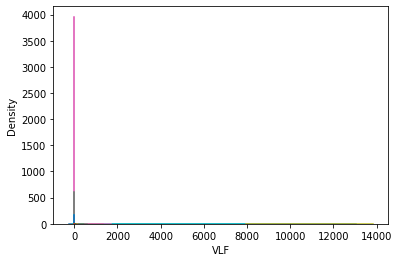

In [7]:
for each in df.columns:
    sns.kdeplot(df[each])

In [21]:
df.isna().any().all(),df_test.isna().any().all()

(True, True)

In [13]:
df_dist=df.describe()
df_dist.columns

Index(['VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT', 'HF_NU',
       'TP', 'LF_HF', 'HF_LF', 'SD1', 'SD2', 'sampen', 'higuci', 'MEAN_RR',
       'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD', 'HR', 'pNN25',
       'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR', 'MEDIAN_REL_RR', 'SDRR_REL_RR',
       'RMSSD_REL_RR', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR', 'KURT_REL_RR',
       'SKEW_REL_RR'],
      dtype='object')

In [ ]:
df.shape

In [ ]:
df.index

In [ ]:
col="HF"
print(df[col].shape)
Q1=df_dist[col]["25%"]
Q3=df_dist[col]["75%"]
#temp=pd.concat([df[df[col]<Q1],df[df[col]<Q1]],axis=1)[col]
#df[(df[col]>Q3) & (df[col]<Q1)]
series1=df[df[col]<Q1][col]
print(series1.shape)
series2=df[df[col]>Q3][col]
print(series2.shape)
series3=series1.append(series2)

In [ ]:
total=df.shape[0]
df_outliers={}
df_inliers={}
for col in df_dist.columns:
    temp=df[col]
    Q1=df_dist[col]["25%"]
    Q3=df_dist[col]["75%"]
    series1=df[df[col]<Q1][col]
    #print(series1.shape)
    series2=df[df[col]>Q3][col]
    #print(series2.shape)
    series3=series1.append(series2)
    df_outliers.update({col:series3})
    df_inliers.update({col : df.drop(index=series3.index)[col]})
    print(series3.shape[0])
    print(col, " : ",series3.shape[0]*100/total," % ","\n")    

In [ ]:
df_outliers["LF_PCT"],df_inliers["LF_PCT"]

In [ ]:
df_outliers["HR"],df_inliers["HR"]

In [18]:
df_outliers["HF"]

uuid
80c795e4-aa56-4cc0-939c-19634b89cbb2      2.108525
d324b1ee-aaa1-4edb-9b46-c597cb0bbd8c      1.489796
79977df1-0e09-4873-bb31-15581002200b      2.572459
ba6a9a9b-5c8b-4c9a-be89-0283898b2d96      8.920651
28f8941e-e36a-4f5c-9cdd-9f1e715b05ed      9.918353
                                           ...    
e1fb60d2-95fa-40c3-be6b-380799ac3df8    135.766749
7e0a9b7c-aab2-4a3c-88c8-d3c326a0ca85    135.162751
404b56c0-d6f2-4a67-9d3a-698f4a6be270     61.080993
a0fc861e-3254-4210-bd5d-37870245f7da     46.636158
1f2eb52d-4f09-4921-a383-ef1bc6221789     60.596026
Name: HF, Length: 184644, dtype: float64

C:\Users\Sheshank_Joshi\anaconda3\envs\tensorflow-gpu\lib\site-packages\seaborn\axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


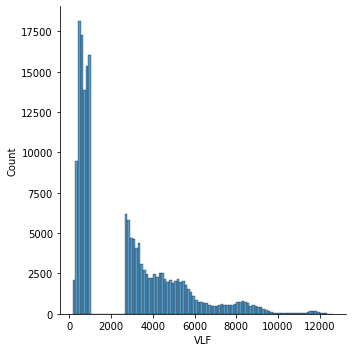

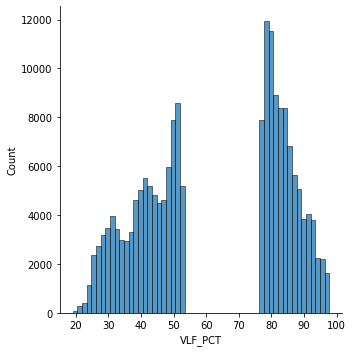

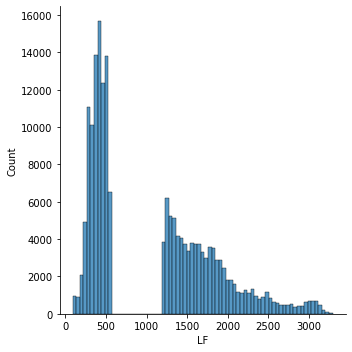

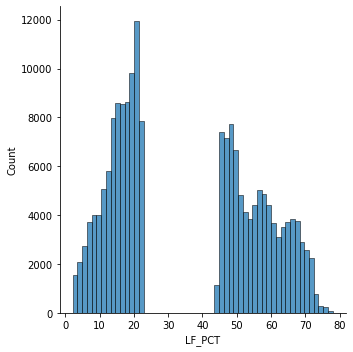

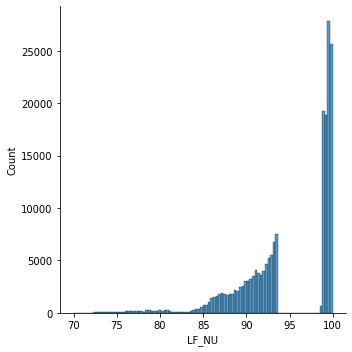

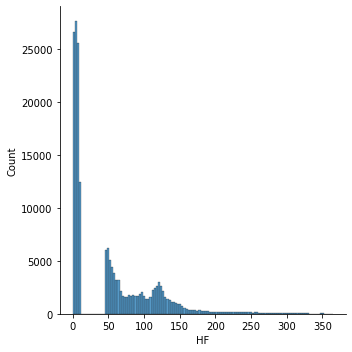

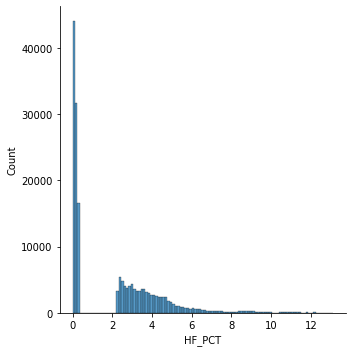

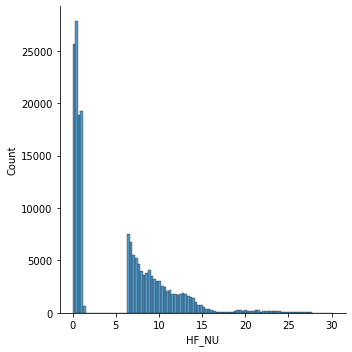

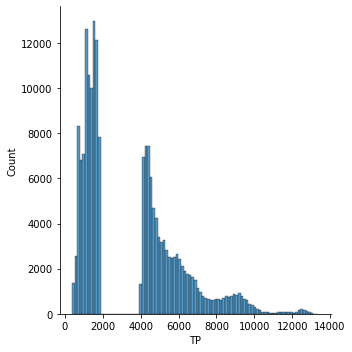

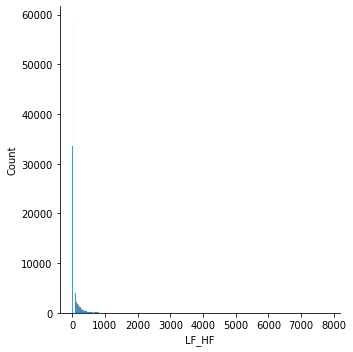

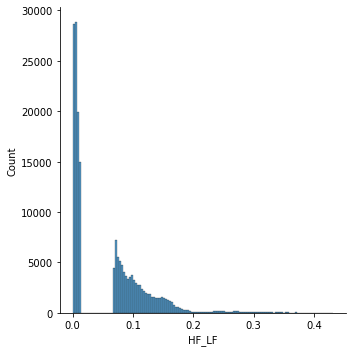

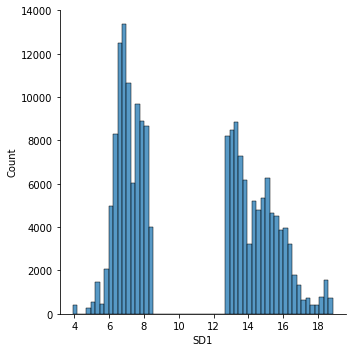

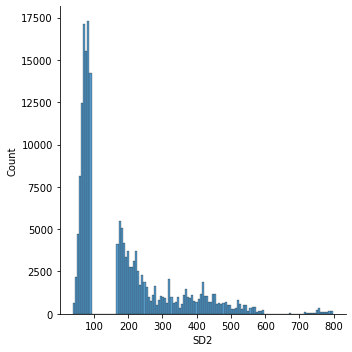

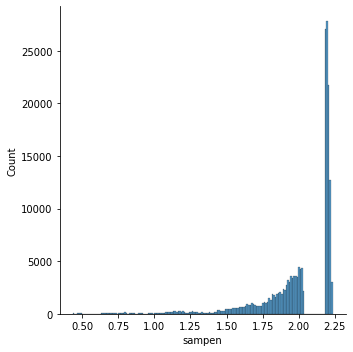

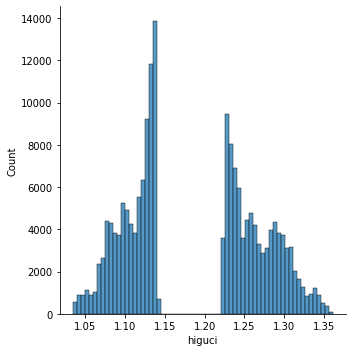

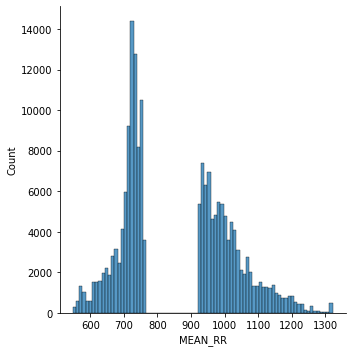

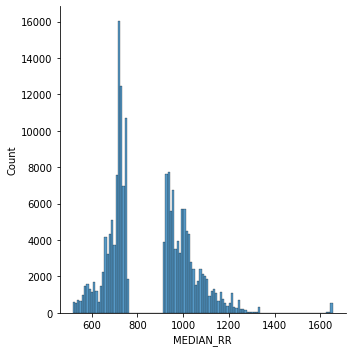

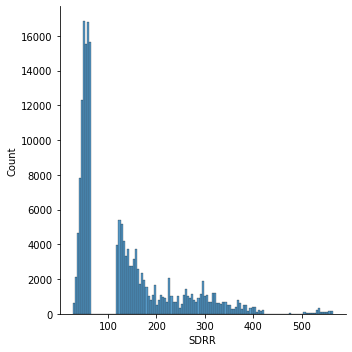

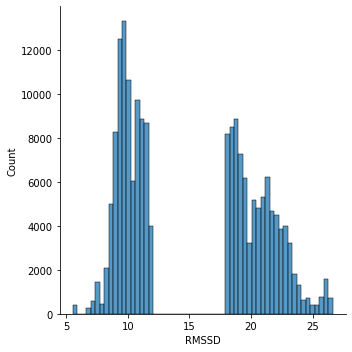

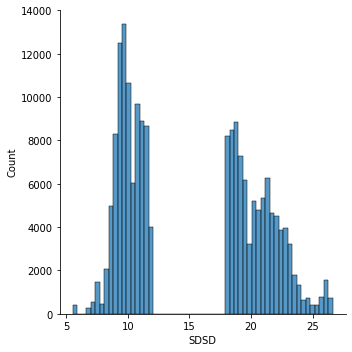

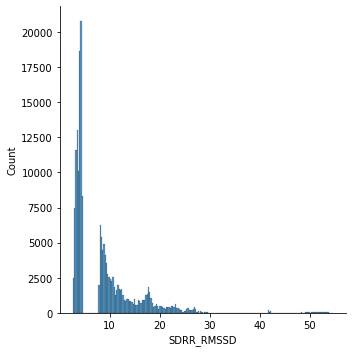

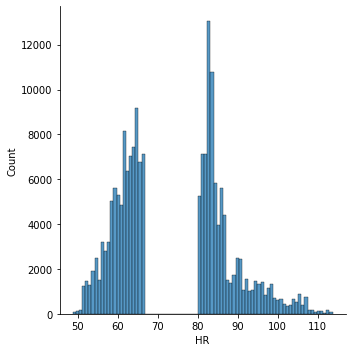

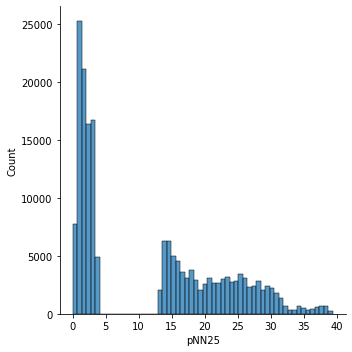

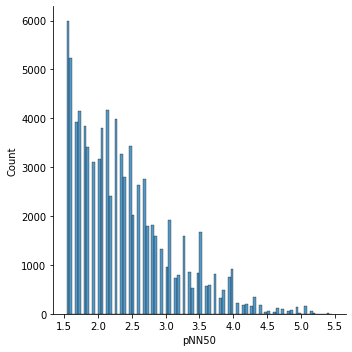

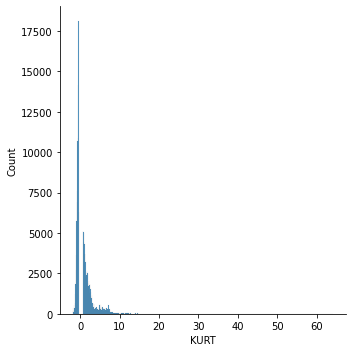

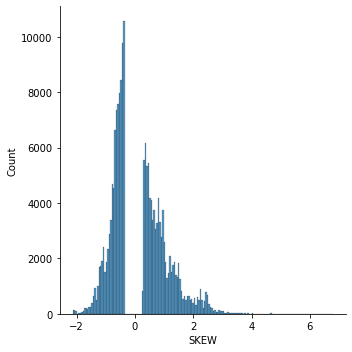

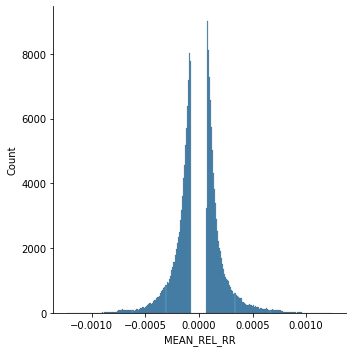

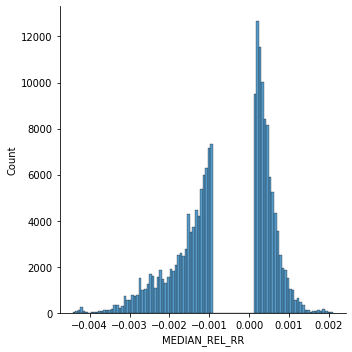

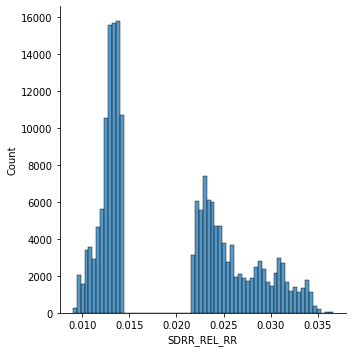

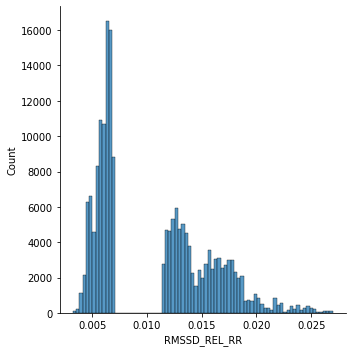

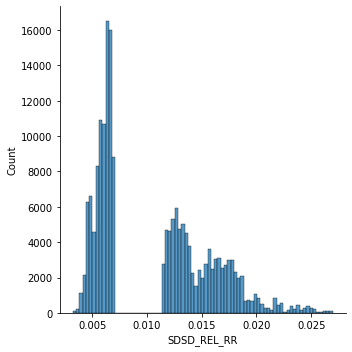

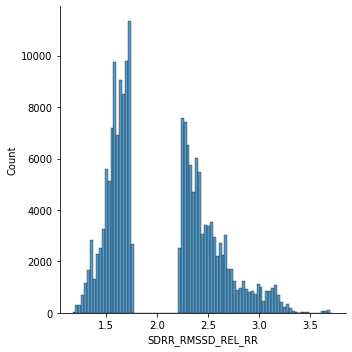

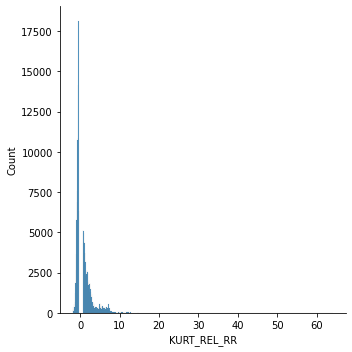

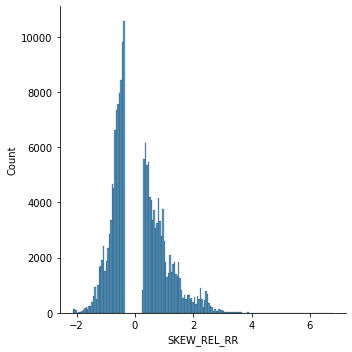

In [19]:
for each in df_outliers.keys():
    sns.displot(df_outliers[each])

In [13]:
for each in df1.uuid:
    if each in df2.uuid:
        pass
    else:
        print(each)

In [14]:
for each in df2.uuid:
    if each in df3.uuid:
        pass
    else:
        print(each)

In [19]:
print(set(df1.uuid)-set(df2.uuid))
print(set(df2.uuid)-set(df1.uuid))
print(set(df2.uuid)-set(df3.uuid))
print(set(df3.uuid)-set(df2.uuid))

set()
set()
set()
set()


In [12]:
df.drop("uuid",axis=1)

KeyError: "['uuid'] not found in axis"

In [8]:
import warnings 
warnings.filterwarnings('ignore')

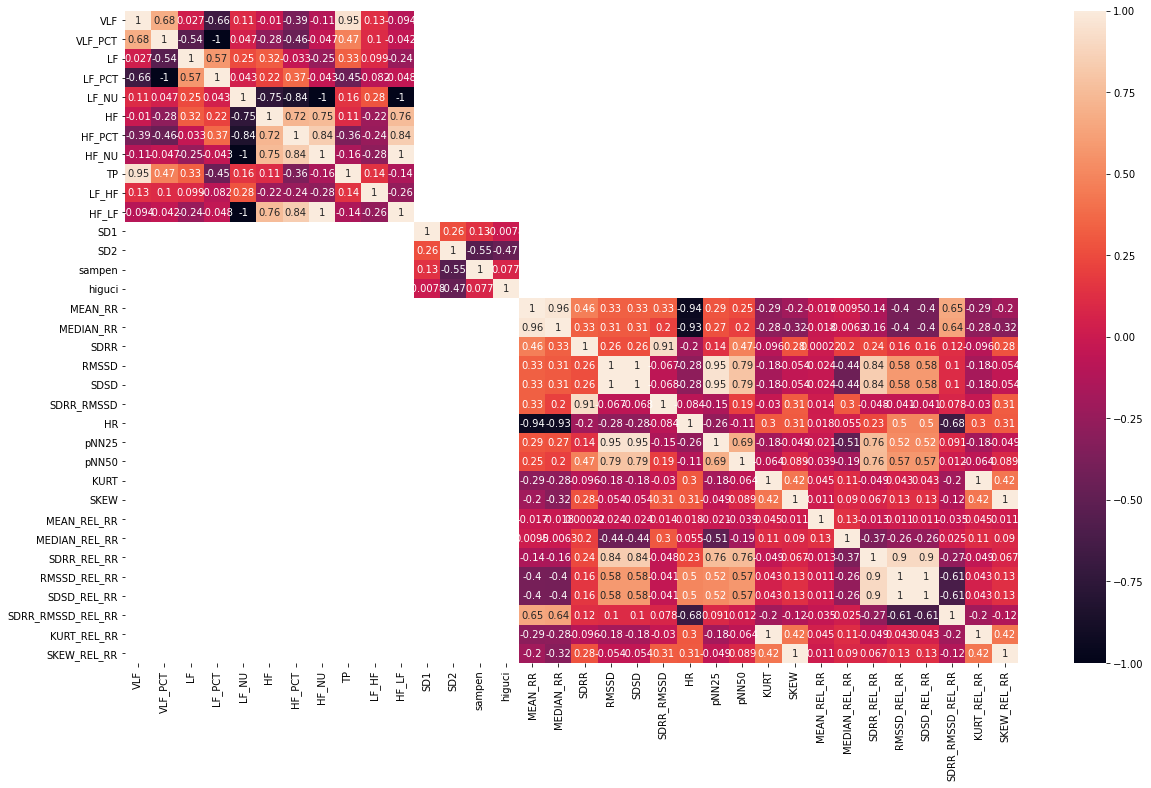

In [9]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True)
plt.show()

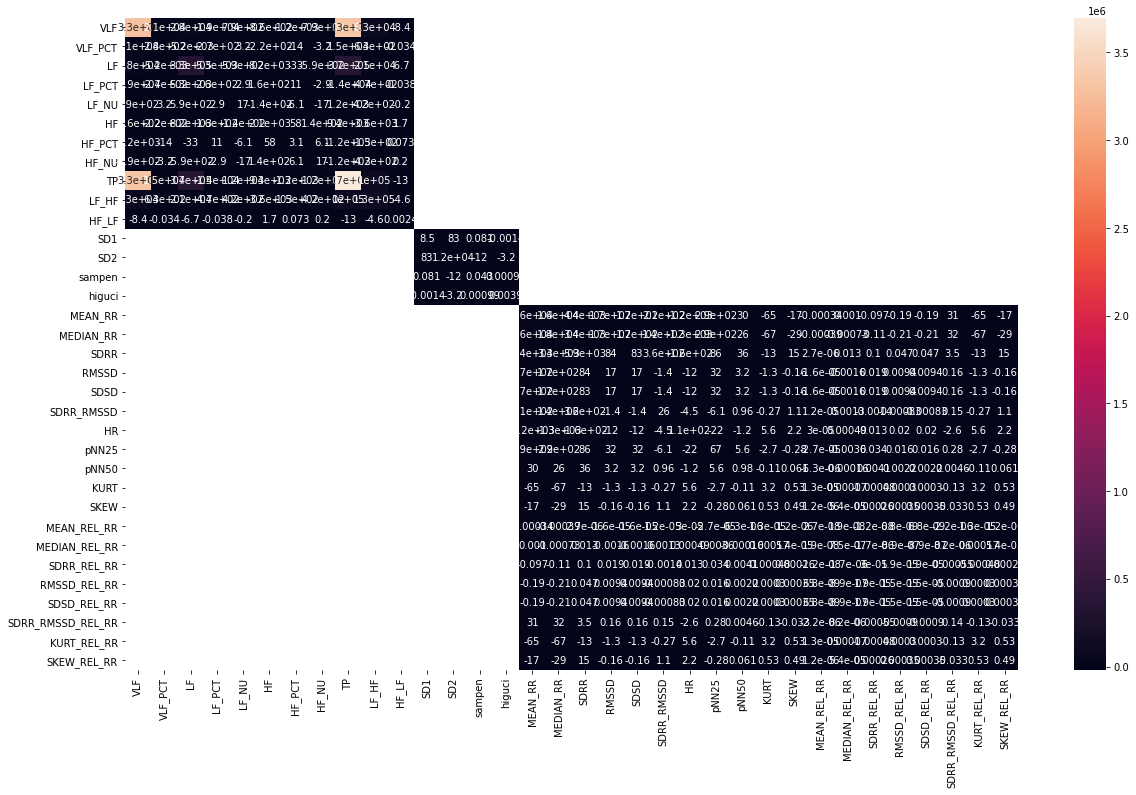

In [23]:
plt.figure(figsize=(20,12))
sns.heatmap(df.cov(),annot=True)
plt.show()

In [24]:
df=pd.get_dummies(data=df,drop_first=True)
df_test=pd.get_dummies(data=df_test,drop_first=True)

MemoryError: Unable to allocate 127. GiB for an array with shape (369289, 369289) and data type uint8

In [30]:
from tensorflow.keras.layers import Activation, Dense, Flatten
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Reshape, BatchNormalization, Dropout
from sklearn.metrics import accuracy_score
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
import tensorflow
import tensorflow.keras as k
###################################################################
#Regressional Neural Network
###################################################################
model_reg_1=Sequential()
model_reg_1.add(BatchNormalization(input_shape=(35,)))
model_reg_1.add(Flatten())
model_reg_1.add(Dense(70,activation="relu",kernel_initializer='random_uniform',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_reg_1.add(Dropout(0.2, input_shape=(50,)))
model_reg_1.add(Dense(35,activation="relu",kernel_initializer='random_uniform',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_reg_1.add(Dropout(0.2, input_shape=(50,)))
model_reg_1.add(Dense(15,activation="relu",kernel_initializer='random_uniform',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_reg_1.add(Dropout(0.5, input_shape=(50,)))
model_reg_1.add(Dense(5,activation="relu",kernel_initializer='random_uniform',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_reg_1.add(Dropout(0.5, input_shape=(50,)))
#model_reg_1.add(Dense(12,activation="relu",kernel_initializer='random_uniform',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
#model_reg_1.add(Dropout(0.5, input_shape=(30,)))
#model_reg_1.add(Dense(36,activation="relu",kernel_initializer='random_uniform',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_reg_1.add(Dense(1))
sgd = optimizers.SGD(lr = 0.01,momentum=0.4)
model_reg_1.compile(optimizer = sgd, loss = 'mae', metrics =tf.keras.metrics.mean_absolute_error)
###################################################################
#
###################################################################

callback = EarlyStopping(monitor='loss', patience=3)


In [32]:
model_reg_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 35)                140       
_________________________________________________________________
flatten (Flatten)            (None, 35)                0         
_________________________________________________________________
dense (Dense)                (None, 70)                2520      
_________________________________________________________________
dropout (Dropout)            (None, 70)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 35)                2485      
_________________________________________________________________
dropout_1 (Dropout)          (None, 35)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 15)                5

In [33]:
t=time.time()
history_reg_1=model_reg_1.fit(df.drop("HR",axis=1),df["HR"],batch_size=2000, validation_split=0.3,epochs = 200,callbacks=[callback])

Epoch 1/200
130/130 [==============================] - 2s 11ms/step - loss: 72.4070 - mean_absolute_error: 72.3535 - val_loss: 49.7318 - val_mean_absolute_error: 49.5111
Epoch 2/200
130/130 [==============================] - 1s 4ms/step - loss: 38.7702 - mean_absolute_error: 38.4571 - val_loss: 22.6513 - val_mean_absolute_error: 22.2286
Epoch 3/200
130/130 [==============================] - 1s 4ms/step - loss: 30.0948 - mean_absolute_error: 29.6638 - val_loss: 20.2014 - val_mean_absolute_error: 19.7582
Epoch 4/200
130/130 [==============================] - 1s 4ms/step - loss: 29.2883 - mean_absolute_error: 28.8441 - val_loss: 18.7765 - val_mean_absolute_error: 18.3325
Epoch 5/200
130/130 [==============================] - 1s 4ms/step - loss: 28.5222 - mean_absolute_error: 28.0781 - val_loss: 18.5312 - val_mean_absolute_error: 18.0850
Epoch 6/200
130/130 [==============================] - 1s 4ms/step - loss: 27.5013 - mean_absolute_error: 27.0512 - val_loss: 17.1889 - val_mean_absolute_

In [34]:
print(time.time()-t)

79.21059346199036


In [37]:
df_test

,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,...,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR
"(62b75db5-bc40-4c8f-9166-daf0efcab4c2, 62b75db5-bc40-4c8f-9166-daf0efcab4c2, 62b75db5-bc40-4c8f-9166-daf0efcab4c2)",1868.532278,76.511189,570.643114,23.366245,99.478197,2.993254,0.122565,0.521803,2442.168645,190.643094,...,-0.680262,-0.233075,0.000016,0.000288,0.012933,0.004578,0.004578,2.825038,-0.680262,-0.233075
"(a99549ad-3eb6-4413-bc90-9053e7f7e684, a99549ad-3eb6-4413-bc90-9053e7f7e684, a99549ad-3eb6-4413-bc90-9053e7f7e684)",568.742845,26.301350,1553.971621,71.862973,97.509212,39.694850,1.835677,2.490788,2162.409316,39.147940,...,-0.034454,-0.051689,0.000040,-0.002749,0.025148,0.013921,0.013921,1.806517,-0.034454,-0.051689
"(cb573d3a-c767-4556-b32e-ad8c08ded214, cb573d3a-c767-4556-b32e-ad8c08ded214, cb573d3a-c767-4556-b32e-ad8c08ded214)",2101.871207,75.836461,655.175895,23.639042,97.829386,14.536877,0.524497,2.170614,2771.583978,45.069921,...,-0.206953,-0.589940,0.000010,-0.000172,0.015533,0.008149,0.008149,1.906180,-0.206953,-0.589940
"(47a0c6de-2aef-4ac3-997d-252fa6fd07f1, 47a0c6de-2aef-4ac3-997d-252fa6fd07f1, 47a0c6de-2aef-4ac3-997d-252fa6fd07f1)",5757.544433,90.562305,592.913021,9.326123,98.817806,7.093235,0.111572,1.182194,6357.550689,83.588517,...,-0.820407,0.487198,-0.000238,-0.000464,0.016882,0.007587,0.007587,2.225116,-0.820407,0.487198
"(de3fd54f-c74e-4fe8-bf2a-7a127f68b312, de3fd54f-c74e-4fe8-bf2a-7a127f68b312, de3fd54f-c74e-4fe8-bf2a-7a127f68b312)",964.696325,70.256575,374.939530,27.305968,91.805057,33.468834,2.437457,8.194943,1373.104689,11.202647,...,1.738453,-0.005082,0.000054,-0.000006,0.013479,0.007811,0.007811,1.725606,1.738453,-0.005082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(11253232-cf0a-4c40-abfb-ac2795effd9b, 11253232-cf0a-4c40-abfb-ac2795effd9b, 11253232-cf0a-4c40-abfb-ac2795effd9b)",1690.286178,75.534076,523.354248,23.387211,95.590958,24.139217,1.078713,4.409042,2237.779643,21.680663,...,-0.011224,-0.243444,0.000207,-0.000493,0.014248,0.007564,0.007564,1.883681,-0.011224,-0.243444
"(38052c36-d08d-4305-905b-830f600ce2b9, 38052c36-d08d-4305-905b-830f600ce2b9, 38052c36-d08d-4305-905b-830f600ce2b9)",1335.773510,76.550710,377.825339,21.652471,92.337427,31.353638,1.796819,7.662573,1744.952487,12.050447,...,6.540759,2.438418,-0.000113,-0.000139,0.013108,0.007507,0.007507,1.746077,6.540759,2.438418
"(8ef3781b-512f-42ce-bcfd-47f5c1070bb0, 8ef3781b-512f-42ce-bcfd-47f5c1070bb0, 8ef3781b-512f-42ce-bcfd-47f5c1070bb0)",1762.102170,47.355959,1951.164991,52.436964,99.606646,7.705286,0.207077,0.393354,3720.972447,253.224210,...,0.973106,-0.681300,0.000306,0.000430,0.022164,0.010680,0.010680,2.075297,0.973106,-0.681300
"(2bf689f3-af22-426d-91cf-e9e173ad3a54, 2bf689f3-af22-426d-91cf-e9e173ad3a54, 2bf689f3-af22-426d-91cf-e9e173ad3a54)",317.702587,57.455826,214.695243,38.827170,91.263190,20.553211,3.717004,8.736810,552.951041,10.445825,...,3.279160,-1.553159,-0.000066,-0.000901,0.009878,0.006219,0.006219,1.588346,3.279160,-1.553159


In [48]:
print([each for each in df_test.columns if each not in df.columns])

[]


In [51]:
df.shape,df_test.shape

((369289, 36), (41033, 35))

In [50]:
df_test=pd.get_dummies(data=df_test,drop_first=True)

In [61]:
y_pred=model_reg_1.predict(df_test)

In [71]:
np.array(y_pred).flatten()

array([67.41239 , 73.63399 , 69.71267 , ..., 65.292786, 76.25115 ,
       75.34108 ], dtype=float32)

In [72]:
y_pred=pd.Series(np.array(y_pred).flatten(),index=df_test.index)

In [73]:
y_pred

(62b75db5-bc40-4c8f-9166-daf0efcab4c2, 62b75db5-bc40-4c8f-9166-daf0efcab4c2, 62b75db5-bc40-4c8f-9166-daf0efcab4c2)    67.412392
(a99549ad-3eb6-4413-bc90-9053e7f7e684, a99549ad-3eb6-4413-bc90-9053e7f7e684, a99549ad-3eb6-4413-bc90-9053e7f7e684)    73.633987
(cb573d3a-c767-4556-b32e-ad8c08ded214, cb573d3a-c767-4556-b32e-ad8c08ded214, cb573d3a-c767-4556-b32e-ad8c08ded214)    69.712669
(47a0c6de-2aef-4ac3-997d-252fa6fd07f1, 47a0c6de-2aef-4ac3-997d-252fa6fd07f1, 47a0c6de-2aef-4ac3-997d-252fa6fd07f1)    65.230637
(de3fd54f-c74e-4fe8-bf2a-7a127f68b312, de3fd54f-c74e-4fe8-bf2a-7a127f68b312, de3fd54f-c74e-4fe8-bf2a-7a127f68b312)    76.320427
                                                                                                                        ...    
(11253232-cf0a-4c40-abfb-ac2795effd9b, 11253232-cf0a-4c40-abfb-ac2795effd9b, 11253232-cf0a-4c40-abfb-ac2795effd9b)    78.745163
(38052c36-d08d-4305-905b-830f600ce2b9, 38052c36-d08d-4305-905b-830f600ce2b9, 38052c36-d08d-4305-905b-830

In [60]:
type(df_test.index)

pandas.core.indexes.base.Index